In [1]:
#importing necessary packages
import scipy as sp
import numpy as np
import pandas as pd
import pandas_profiling as pp
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced
from matplotlib import pyplot as plt
import random

#set seed
random.seed(420)

#loading csv into dataframe
url = 'https://raw.githubusercontent.com/shantanudeshpande94/bankruptcy-prediction/master/5year.csv'
bankruptcy_df = pd.read_csv(url)

Using TensorFlow backend.


In [3]:
#to replace '?' with NA values

bankruptcy_df.replace({'?': None},inplace =True)

In [4]:
#to check null values in a column

bankruptcy_df.isna().sum()

Attr1       3
Attr2       3
Attr3       3
Attr4      21
Attr5      11
         ... 
Attr61     15
Attr62      0
Attr63     21
Attr64    107
class       0
Length: 65, dtype: int64

In [5]:
#converting from object to float64

bankruptcy_df['Attr1'] = pd.to_numeric(bankruptcy_df['Attr1'])
bankruptcy_df['Attr2'] = pd.to_numeric(bankruptcy_df['Attr2'])
bankruptcy_df['Attr3'] = pd.to_numeric(bankruptcy_df['Attr3'])
bankruptcy_df['Attr4'] = pd.to_numeric(bankruptcy_df['Attr4'])
bankruptcy_df['Attr5'] = pd.to_numeric(bankruptcy_df['Attr5'])
bankruptcy_df['Attr6'] = pd.to_numeric(bankruptcy_df['Attr6'])
bankruptcy_df['Attr7'] = pd.to_numeric(bankruptcy_df['Attr7'])
bankruptcy_df['Attr8'] = pd.to_numeric(bankruptcy_df['Attr8'])
bankruptcy_df['Attr9'] = pd.to_numeric(bankruptcy_df['Attr9'])
bankruptcy_df['Attr10'] = pd.to_numeric(bankruptcy_df['Attr10'])
bankruptcy_df['Attr11'] = pd.to_numeric(bankruptcy_df['Attr11'])
bankruptcy_df['Attr12'] = pd.to_numeric(bankruptcy_df['Attr12'])
bankruptcy_df['Attr13'] = pd.to_numeric(bankruptcy_df['Attr13'])
bankruptcy_df['Attr14'] = pd.to_numeric(bankruptcy_df['Attr14'])
bankruptcy_df['Attr15'] = pd.to_numeric(bankruptcy_df['Attr15'])
bankruptcy_df['Attr16'] = pd.to_numeric(bankruptcy_df['Attr16'])
bankruptcy_df['Attr17'] = pd.to_numeric(bankruptcy_df['Attr17'])
bankruptcy_df['Attr18'] = pd.to_numeric(bankruptcy_df['Attr18'])
bankruptcy_df['Attr19'] = pd.to_numeric(bankruptcy_df['Attr19'])
bankruptcy_df['Attr20'] = pd.to_numeric(bankruptcy_df['Attr20'])
bankruptcy_df['Attr21'] = pd.to_numeric(bankruptcy_df['Attr21'])
bankruptcy_df['Attr22'] = pd.to_numeric(bankruptcy_df['Attr22'])
bankruptcy_df['Attr23'] = pd.to_numeric(bankruptcy_df['Attr23'])
bankruptcy_df['Attr24'] = pd.to_numeric(bankruptcy_df['Attr24'])
bankruptcy_df['Attr25'] = pd.to_numeric(bankruptcy_df['Attr25'])
bankruptcy_df['Attr26'] = pd.to_numeric(bankruptcy_df['Attr26'])
bankruptcy_df['Attr27'] = pd.to_numeric(bankruptcy_df['Attr27'])
bankruptcy_df['Attr28'] = pd.to_numeric(bankruptcy_df['Attr28'])
bankruptcy_df['Attr29'] = pd.to_numeric(bankruptcy_df['Attr29'])
bankruptcy_df['Attr30'] = pd.to_numeric(bankruptcy_df['Attr30'])
bankruptcy_df['Attr31'] = pd.to_numeric(bankruptcy_df['Attr31'])
bankruptcy_df['Attr32'] = pd.to_numeric(bankruptcy_df['Attr32'])
bankruptcy_df['Attr33'] = pd.to_numeric(bankruptcy_df['Attr33'])
bankruptcy_df['Attr34'] = pd.to_numeric(bankruptcy_df['Attr34'])
bankruptcy_df['Attr35'] = pd.to_numeric(bankruptcy_df['Attr35'])
bankruptcy_df['Attr36'] = pd.to_numeric(bankruptcy_df['Attr36'])
bankruptcy_df['Attr37'] = pd.to_numeric(bankruptcy_df['Attr37'])
bankruptcy_df['Attr38'] = pd.to_numeric(bankruptcy_df['Attr38'])
bankruptcy_df['Attr39'] = pd.to_numeric(bankruptcy_df['Attr39'])
bankruptcy_df['Attr40'] = pd.to_numeric(bankruptcy_df['Attr40'])
bankruptcy_df['Attr41'] = pd.to_numeric(bankruptcy_df['Attr41'])
bankruptcy_df['Attr42'] = pd.to_numeric(bankruptcy_df['Attr42'])
bankruptcy_df['Attr43'] = pd.to_numeric(bankruptcy_df['Attr43'])
bankruptcy_df['Attr44'] = pd.to_numeric(bankruptcy_df['Attr44'])
bankruptcy_df['Attr45'] = pd.to_numeric(bankruptcy_df['Attr45'])
bankruptcy_df['Attr46'] = pd.to_numeric(bankruptcy_df['Attr46'])
bankruptcy_df['Attr47'] = pd.to_numeric(bankruptcy_df['Attr47'])
bankruptcy_df['Attr48'] = pd.to_numeric(bankruptcy_df['Attr48'])
bankruptcy_df['Attr49'] = pd.to_numeric(bankruptcy_df['Attr49'])
bankruptcy_df['Attr50'] = pd.to_numeric(bankruptcy_df['Attr50'])
bankruptcy_df['Attr51'] = pd.to_numeric(bankruptcy_df['Attr51'])
bankruptcy_df['Attr52'] = pd.to_numeric(bankruptcy_df['Attr52'])
bankruptcy_df['Attr53'] = pd.to_numeric(bankruptcy_df['Attr53'])
bankruptcy_df['Attr54'] = pd.to_numeric(bankruptcy_df['Attr54'])
bankruptcy_df['Attr55'] = pd.to_numeric(bankruptcy_df['Attr55'])
bankruptcy_df['Attr56'] = pd.to_numeric(bankruptcy_df['Attr56'])
bankruptcy_df['Attr57'] = pd.to_numeric(bankruptcy_df['Attr57'])
bankruptcy_df['Attr58'] = pd.to_numeric(bankruptcy_df['Attr58'])
bankruptcy_df['Attr59'] = pd.to_numeric(bankruptcy_df['Attr59'])
bankruptcy_df['Attr60'] = pd.to_numeric(bankruptcy_df['Attr60'])
bankruptcy_df['Attr61'] = pd.to_numeric(bankruptcy_df['Attr61'])
bankruptcy_df['Attr62'] = pd.to_numeric(bankruptcy_df['Attr62'])
bankruptcy_df['Attr63'] = pd.to_numeric(bankruptcy_df['Attr63'])
bankruptcy_df['Attr64'] = pd.to_numeric(bankruptcy_df['Attr64'])

bankruptcy_df.dtypes

bankruptcy_df.mean()


Attr1      -0.022347
Attr2       0.465086
Attr3       0.189155
Attr4       4.892476
Attr5      19.406758
             ...    
Attr61     10.941497
Attr62    241.978184
Attr63      9.127741
Attr64     65.276716
class       0.069374
Length: 65, dtype: float64

In [ ]:
import pandas_profiling as pp

#check profile report of the dataset

profile = bankruptcy_df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

In [6]:
# dropping duplicate values 

bankruptcy_df.drop_duplicates(keep=False,inplace=True) 

In [7]:
#delete because of large number of missing values

del bankruptcy_df['Attr37']

In [8]:
#imputing missing values by mean

bankruptcy_df.fillna(bankruptcy_df.mean(), inplace=True)

#number of missing values

bankruptcy_df.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 64, dtype: int64

In [ ]:
#correlation analysis

corrmat = bankruptcy_df.corr() 
  
corrmat.to_csv("correlation-analysis.csv")    
    
#plotting correlation graph   

import seaborn as sns 

f, ax = plt.subplots(figsize =(15, 15)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [9]:
#delete because of high correlation

bankruptcy_df = bankruptcy_df.drop(['Attr11','Attr16','Attr18','Attr22','Attr23','Attr26','Attr31','Attr33',
        'Attr34','Attr35','Attr38','Attr4','Attr40','Attr44','Attr46','Attr48','Attr49','Attr50','Attr54',
        'Attr56','Attr60','Attr62','Attr63','Attr64','Attr7','Attr8'], axis = 1)

# FEATURE SELECTION USING RANDOM FOREST

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [11]:
# Create a list of feature names
feature_labels = ['Attr1','Attr2','Attr3','Attr5','Attr6','Attr9','Attr10',
              'Attr12','Attr13','Attr14','Attr15','Attr17','Attr19','Attr20',
              'Attr21','Attr24','Attr25','Attr27','Attr28','Attr29','Attr30',
              'Attr32','Attr36','Attr39',
              'Attr41','Attr42','Attr43','Attr45','Attr47',
              'Attr51','Attr52','Attr53','Attr55','Attr57','Attr58','Attr59',
               'Attr61']

In [12]:
#Create X from the features
X = bankruptcy_df[feature_labels].values

# Create y from output
y = bankruptcy_df['class'].values.ravel()

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
rf_clf.fit(X, y)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, rf_clf.feature_importances_):
    print(feature)

('Attr1', 0.027591918833885107)
('Attr2', 0.016095535109824543)
('Attr3', 0.024633088062148565)
('Attr5', 0.017566884919741874)
('Attr6', 0.022341684789630053)
('Attr9', 0.024445543623779965)
('Attr10', 0.018169188943307345)
('Attr12', 0.020546371953517942)
('Attr13', 0.029548036841272433)
('Attr14', 0.027224671754813624)
('Attr15', 0.02586829696739935)
('Attr17', 0.016494773722498114)
('Attr19', 0.02392922848783537)
('Attr20', 0.014438103931648572)
('Attr21', 0.09961359554542011)
('Attr24', 0.038206224024632474)
('Attr25', 0.022354495094863536)
('Attr27', 0.06966182184329177)
('Attr28', 0.022296572829685384)
('Attr29', 0.02764127489026749)
('Attr30', 0.0163657865079402)
('Attr32', 0.016173909103129686)
('Attr36', 0.018125411522987286)
('Attr39', 0.056015258394595084)
('Attr41', 0.045584182145104)
('Attr42', 0.04182460764531087)
('Attr43', 0.018639018353756486)
('Attr45', 0.01903872933861213)
('Attr47', 0.013465773485520045)
('Attr51', 0.018854939962981758)
('Attr52', 0.015557464847323

In [13]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(rf_clf, threshold=0.03)

# Train the selector
sfm.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
     

In [14]:
#Print the names of the most important features

for feature_list_index in sfm.get_support(indices=True):
    print(feature_labels[feature_list_index])

Attr21
Attr24
Attr27
Attr39
Attr41
Attr42
Attr58


In [15]:
X_imp_features = sfm.transform(X)

In [16]:
#converting X_filtered to Dataframe

X_imp_features = pd.DataFrame(data=X_imp_features,
          index=np.arange(1, 5791),
          columns=np.arange(1, 8))


# RANDOM FOREST MODEL

In [17]:
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

In [18]:
from sklearn.model_selection import StratifiedKFold
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

t_n = []
f_p = []
f_n = []
t_p = []
cv = StratifiedKFold(n_splits=5)
for train_idx, test_idx, in cv.split(X_imp_features, y):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    #X_train, y_train = SMOTEENN().fit_resample(X_train, y_train)
    clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_rf_pred = clf.predict(X_test)
    accuracy_score(y_test, y_rf_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_rf_pred).ravel()
    t_n.append(tn)
    f_p.append(fp)
    f_n.append(fn)
    t_p.append(tp)
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
return np.array(t_n)
return np.array(f_p)
return np.array(f_n)
return np.array(t_p)

True Negatives:  1072
False Positives:  5
False Negatives:  76
True Positives:  6
True Negatives:  1071
False Positives:  6
False Negatives:  45
True Positives:  36
True Negatives:  1058
False Positives:  19
False Negatives:  40
True Positives:  41
True Negatives:  1072
False Positives:  5
False Negatives:  42
True Positives:  39
True Negatives:  1067
False Positives:  9
False Negatives:  49
True Positives:  32


SyntaxError: 'return' outside function (<ipython-input-18-9828e273d6db>, line 28)

In [19]:
Avg_tn = round(sum(t_n)/len(t_n))
Avg_fp = round(sum(f_p)/len(f_p))
Avg_fn = round(sum(f_n)/len(f_n))
Avg_tp = round(sum(t_p)/len(t_p))

In [20]:
import math

#Accuracy
Accuracy_rf = (Avg_tp+Avg_tn)/(Avg_tp+Avg_tn+Avg_fp+Avg_fn)
print("Accuracy {:0.2f}".format(Accuracy_rf))

#Specificity
Specificity_rf = Avg_tn/(Avg_tn+Avg_fp) 
print("Specificity {:0.2f}".format(Specificity_rf))

#Recall 
Recall_rf = Avg_tp/(Avg_tp+Avg_fn) 
print("Recall / Sensitivity {:0.2f}".format(Recall_rf))

#Precision
Precision_rf = Avg_tp/(Avg_tp + Avg_fp)

#GMean
GM_rf = math.sqrt(Specificity_rf*Recall_rf)
print("Geometric Mean Score {:0.2f}".format(GM_rf))

Accuracy 0.95
Specificity 0.99
Recall / Sensitivity 0.38
Geometric Mean Score 0.62


# DECISION TREE

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

from sklearn.model_selection import StratifiedKFold
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

tn_dt = []
fp_dt = []
fn_dt = []
tp_dt = []
cv = StratifiedKFold(n_splits=5)
for train_idx_dt, test_idx_dt, in cv.split(X_imp_features, y):
    X_train_dt, y_train_dt = X[train_idx_dt], y[train_idx_dt]
    X_test_dt, y_test_dt = X[test_idx_dt], y[test_idx_dt]
   # X_train_dt, y_train_dt = SMOTEENN().fit_resample(X_train_dt, y_train_dt)
    
    dt = DecisionTreeClassifier()
    dt.fit(X_train_dt, y_train_dt)
    y_dt_pred = dt.predict(X_test_dt)
    accuracy_score(y_test_dt, y_dt_pred)
    tn, fp, fn, tp = confusion_matrix(y_test_dt, y_dt_pred).ravel()
    tn_dt.append(tn)
    fp_dt.append(fp)
    fn_dt.append(fn)
    tp_dt.append(tp)
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
return np.array(tn_dt)
return np.array(fp_dt)
return np.array(fn_dt)
return np.array(tp_dt)

c:\users\shant\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


True Negatives:  1041
False Positives:  36
False Negatives:  67
True Positives:  15
True Negatives:  1038
False Positives:  39
False Negatives:  26
True Positives:  55
True Negatives:  1024
False Positives:  53
False Negatives:  21
True Positives:  60
True Negatives:  1035
False Positives:  42
False Negatives:  31
True Positives:  50
True Negatives:  1036
False Positives:  40
False Negatives:  33
True Positives:  48


SyntaxError: 'return' outside function (<ipython-input-21-e1ec3006edbf>, line 34)

In [22]:
Avg_tn_dt = round(sum(tn_dt)/len(tn_dt))
Avg_fp_dt = round(sum(fp_dt)/len(fp_dt))
Avg_fn_dt = round(sum(fn_dt)/len(fn_dt))
Avg_tp_dt = round(sum(tp_dt)/len(tp_dt))

In [23]:
import math

#Accuracy
Accuracy_dt = (Avg_tp_dt+Avg_tn_dt)/(Avg_tp_dt+Avg_tn_dt+Avg_fp_dt+Avg_fn_dt)
print("Accuracy {:0.2f}".format(Accuracy_dt))

#Specificity
Specificity_dt = Avg_tn_dt/(Avg_tn_dt+Avg_fp_dt) 
print("Specificity {:0.2f}".format(Specificity_dt))

#Recall 
Recall_dt = Avg_tp_dt/(Avg_tp_dt+Avg_fn_dt) 
print("Recall / Sensitivity {:0.2f}".format(Recall_dt))

#Precision
Precision_dt = Avg_tp_dt/(Avg_tp_dt + Avg_fp_dt)

#GMean
GM_dt = math.sqrt(Specificity_dt*Recall_dt)
print("Geometric Mean Score {:0.2f}".format(GM_dt))

Accuracy 0.93
Specificity 0.96
Recall / Sensitivity 0.56
Geometric Mean Score 0.73


# KNN

In [24]:
import numpy as np
from sklearn import neighbors
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

tn_knn = []
fp_knn = []
fn_knn = []
tp_knn = []
cv = StratifiedKFold(n_splits=5)
for train_idx_knn, test_idx_knn, in cv.split(X_imp_features, y):
    X_train_knn, y_train_knn = X[train_idx_knn], y[train_idx_knn]
    X_test_knn, y_test_knn = X[test_idx_knn], y[test_idx_knn]
   # X_train_knn, y_train_knn = SMOTEENN().fit_resample(X_train_knn, y_train_knn)
    
    clf_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    clf_knn.fit(X_train_knn, y_train_knn)
    
    y_knn_pred = clf_knn.predict(X_test_knn)
    accuracy_score(y_test_knn, y_knn_pred)
    tn, fp, fn, tp = confusion_matrix(y_test_knn, y_knn_pred).ravel()
    tn_knn.append(tn)
    fp_knn.append(fp)
    fn_knn.append(fn)
    tp_knn.append(tp)
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
return np.array(tn_knn)
return np.array(fp_knn)
return np.array(fn_knn)
return np.array(tp_knn)

True Negatives:  1054
False Positives:  23
False Negatives:  72
True Positives:  10
True Negatives:  1069
False Positives:  8
False Negatives:  66
True Positives:  15
True Negatives:  1054
False Positives:  23
False Negatives:  71
True Positives:  10
True Negatives:  1054
False Positives:  23
False Negatives:  71
True Positives:  10
True Negatives:  1061
False Positives:  15
False Negatives:  70
True Positives:  11


SyntaxError: 'return' outside function (<ipython-input-24-254a9e5cad9f>, line 40)

In [25]:
Avg_tn_knn = round(sum(tn_knn)/len(tn_knn))
Avg_fp_knn = round(sum(fp_knn)/len(fp_knn))
Avg_fn_knn = round(sum(fn_knn)/len(fn_knn))
Avg_tp_knn = round(sum(tp_knn)/len(tp_knn))

In [26]:
import math

#Accuracy
Accuracy_knn = (Avg_tp_knn+Avg_tn_knn)/(Avg_tp_knn+Avg_tn_knn+Avg_fp_knn+Avg_fn_knn)
print("Accuracy {:0.2f}".format(Accuracy_knn))

#Specificity
Specificity_knn = Avg_tn_knn/(Avg_tn_knn+Avg_fp_knn) 
print("Specificity {:0.2f}".format(Specificity_knn))

#Recall 
Recall_knn = Avg_tp_knn/(Avg_tp_knn+Avg_fn_knn) 
print("Recall / Sensitivity {:0.2f}".format(Recall_knn))

#Precision
Precision_knn = Avg_tp_knn/(Avg_tp_knn + Avg_fp_knn)

#GMean
GM_knn = math.sqrt(Specificity_knn*Recall_knn)
print("Geometric Mean Score {:0.2f}".format(GM_knn))

Accuracy 0.92
Specificity 0.98
Recall / Sensitivity 0.14
Geometric Mean Score 0.37


# ADABOOST

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

tn_ada = []
fp_ada = []
fn_ada = []
tp_ada = []
cv = StratifiedKFold(n_splits=5)
for train_idx_ada, test_idx_ada, in cv.split(X_imp_features, y):
    X_train_ada, y_train_ada = X[train_idx_ada], y[train_idx_ada]
    X_test_ada, y_test_ada = X[test_idx_ada], y[test_idx_ada]
    #X_train_ada, y_train_ada = SMOTEENN().fit_resample(X_train_ada, y_train_ada)
    
    ada_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200)
    ada_classifier.fit(X_train_ada, y_train_ada)
    
    y_ada_pred = ada_classifier.predict(X_test_ada)
    accuracy_score(y_test_ada, y_ada_pred)
    tn, fp, fn, tp = confusion_matrix(y_test_ada, y_ada_pred).ravel()
    tn_ada.append(tn)
    fp_ada.append(fp)
    fn_ada.append(fn)
    tp_ada.append(tp)
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
return np.array(tn_ada)
return np.array(fp_ada)
return np.array(fn_ada)
return np.array(tp_ada)

True Negatives:  1065
False Positives:  12
False Negatives:  67
True Positives:  15
True Negatives:  1059
False Positives:  18
False Negatives:  34
True Positives:  47
True Negatives:  1050
False Positives:  27
False Negatives:  31
True Positives:  50
True Negatives:  1057
False Positives:  20
False Negatives:  38
True Positives:  43
True Negatives:  1061
False Positives:  15
False Negatives:  34
True Positives:  47


SyntaxError: 'return' outside function (<ipython-input-27-66897860d3b5>, line 33)

In [28]:
Avg_tn_ada = round(sum(tn_ada)/len(tn_ada))
Avg_fp_ada = round(sum(fp_ada)/len(fp_ada))
Avg_fn_ada = round(sum(fn_ada)/len(fn_ada))
Avg_tp_ada = round(sum(tp_ada)/len(tp_ada))

In [29]:
import math

#Accuracy
Accuracy_ada = (Avg_tp_ada+Avg_tn_ada)/(Avg_tp_ada+Avg_tn_ada+Avg_fp_ada+Avg_fn_ada)
print("Accuracy {:0.2f}".format(Accuracy_ada))

#Specificity
Specificity_ada = Avg_tn_ada/(Avg_tn_ada+Avg_fp_ada) 
print("Specificity {:0.2f}".format(Specificity_ada))

#Recall 
Recall_ada = Avg_tp_ada/(Avg_tp_ada+Avg_fn_ada) 
print("Recall / Sensitivity {:0.2f}".format(Recall_ada))

#Precision
Precision_ada = Avg_tp_ada/(Avg_tp_ada + Avg_fp_ada)

#GMean
GM_ada = math.sqrt(Specificity_ada*Recall_ada)
print("Geometric Mean Score {:0.2f}".format(GM_ada))

Accuracy 0.95
Specificity 0.98
Recall / Sensitivity 0.49
Geometric Mean Score 0.70


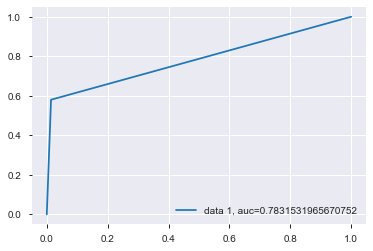

# PLOTTING GRAPHS

In [30]:
Accuracy_comparison = {'Random Forest': Accuracy_rf, 'Decision Tree': Accuracy_dt, 'KNN': Accuracy_knn, 'Adaboost': Accuracy_ada}

In [31]:
Accuracy_comparison

{'Random Forest': 0.9490500863557858,
 'Decision Tree': 0.9327006039689387,
 'KNN': 0.9239412273120138,
 'Adaboost': 0.9490060501296457}

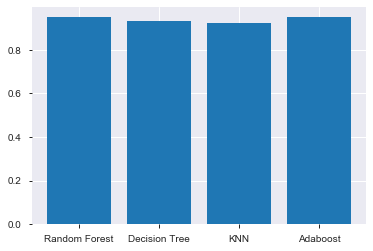

In [32]:
plt.bar(range(len(Accuracy_comparison)), list(Accuracy_comparison.values()), align='center')
plt.xticks(range(len(Accuracy_comparison)), list(Accuracy_comparison.keys()))

plt.show()

In [33]:
Sensitivity_comparison = {'Random Forest': Recall_rf, 'Decision Tree': Recall_dt, 'KNN': Recall_knn, 'Adaboost': Recall_ada}

In [34]:
Sensitivity_comparison

{'Random Forest': 0.38271604938271603,
 'Decision Tree': 0.5609756097560976,
 'KNN': 0.13580246913580246,
 'Adaboost': 0.49382716049382713}

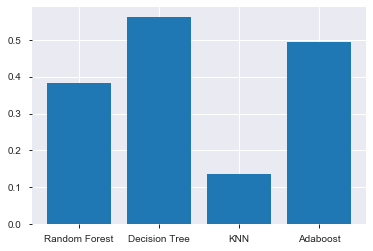

In [35]:
plt.bar(range(len(Sensitivity_comparison)), list(Sensitivity_comparison.values()), align='center')
plt.xticks(range(len(Sensitivity_comparison)), list(Sensitivity_comparison.keys()))

plt.show()

In [36]:
Specificity_comparison = {'Random Forest': Specificity_rf, 'Decision Tree': Specificity_dt, 'KNN': Specificity_knn, 'Adaboost': Specificity_ada}

In [37]:
Specificity_comparison

{'Random Forest': 0.9916434540389972,
 'Decision Tree': 0.9610027855153204,
 'KNN': 0.983271375464684,
 'Adaboost': 0.983271375464684}

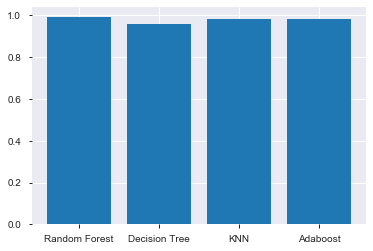

In [38]:
plt.bar(range(len(Specificity_comparison)), list(Specificity_comparison.values()), align='center')
plt.xticks(range(len(Specificity_comparison)), list(Specificity_comparison.keys()))

plt.show()

In [43]:
Gmean_comparison = {'Random Forest': GM_rf, 'Decision Tree': GM_dt, 'KNN': GM_knn, 'Adaboost': GM_ada}

In [44]:
Gmean_comparison

{'Random Forest': 0.6160502131531455,
 'Decision Tree': 0.7342336982063443,
 'KNN': 0.3654185006518701,
 'Adaboost': 0.6968257395795484}

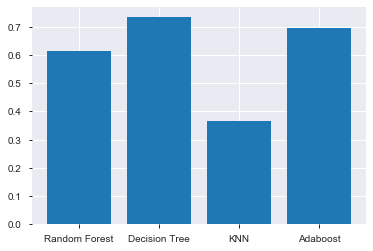

In [45]:
plt.bar(range(len(Gmean_comparison)), list(Gmean_comparison.values()), align='center')
plt.xticks(range(len(Gmean_comparison)), list(Gmean_comparison.keys()))

plt.show()